<h1 style='background:#483D8B; border:0; border-radius:10px; font-weight:bold; color:white; text-align:center; padding:10px; margin:10px;'>IMPORTING THE RELEVANT LIBRARIES</h1>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 15)})

<h1 style='background:#483D8B; border:0; border-radius:10px; font-weight:bold; color:white; text-align:center; padding:10px; margin:10px;'>EXPLORATORY DATA ANALYSIS</h1>

In [7]:
raw_data = pd.read_csv('input_data/hr_employee_churn_data.csv')
raw_data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


## **<span style="color:#483D8B;"><justify>DATASET INFO</justify></span>**

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


## **<span style="color:#483D8B;"><justify>DESCRIPTIVE STATISTICS</justify></span>**

In [9]:
raw_data.describe(include='all')

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7316,NaN
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,NaN,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,NaN,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,NaN,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,NaN,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,NaN,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,NaN,0.000000


## **<span style="color:#483D8B;"><justify>VISUALISING CATEGORICAL DATA</justify></span>**

<AxesSubplot:xlabel='left', ylabel='count'>

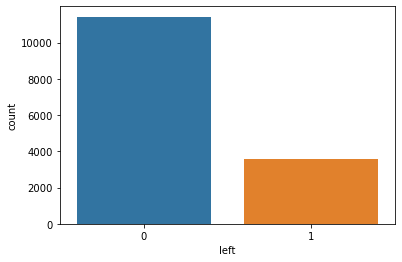

In [10]:
sns.countplot(data=raw_data, x='left')

<ipython-input-43-985a8bd072de>:9: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



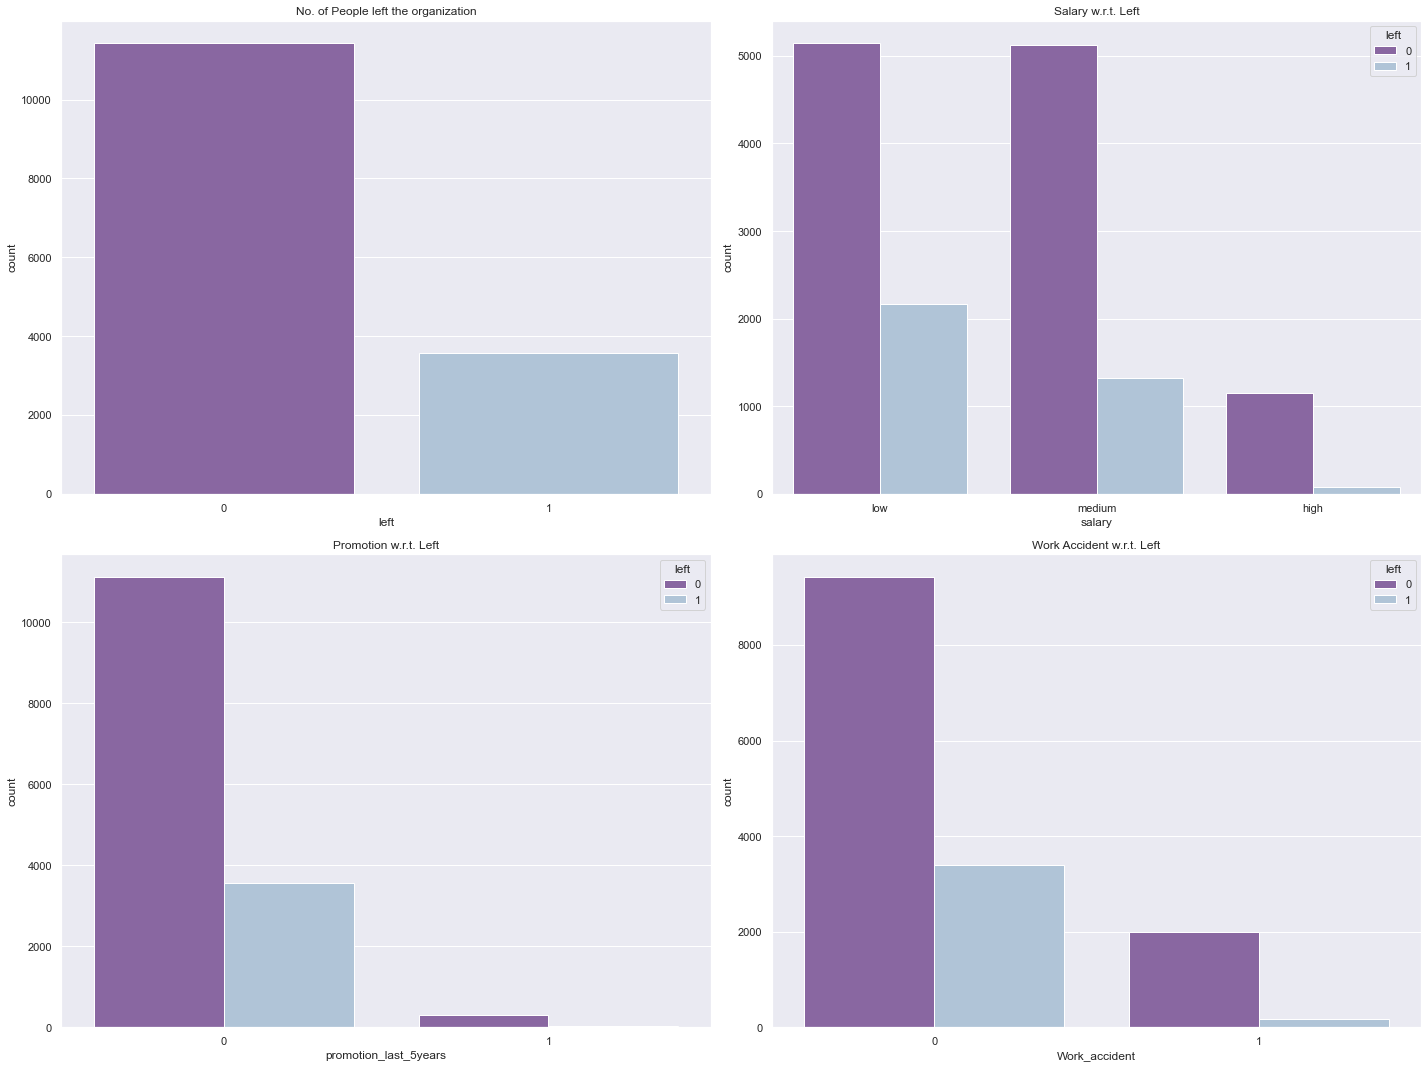

In [43]:
fig, ax = plt.subplots(2,2)
sns.countplot(data=raw_data, x='left', ax=ax[0, 0], palette='BuPu_r').set(title='No. of People left the organization')
sns.countplot(data=raw_data, x='salary', ax=ax[0, 1], hue='left', palette='BuPu_r').set(title='Salary w.r.t. Left')
sns.countplot(data=raw_data, x='promotion_last_5years', ax=ax[1, 0], hue='left', palette='BuPu_r').set(title='Promotion w.r.t. Left')
sns.countplot(data=raw_data, x='Work_accident', ax=ax[1, 1], hue='left', palette='BuPu_r').set(title='Work Accident w.r.t. Left')

fig.tight_layout()
fig.show()

**<span>Take-Away from the plots:- </span>**

* **<span>There is a class imbalance as less people left the organisation.</span>**
* **<span>Employees having lower salary tend to leave the organisation.</span>**
* **<span>Non-Promoted Employees tend to leave the organisation.</span>**
* **<span>Employee left more who did not made an accident.</span>** [Less Important Feature]


## **<span style="color:#483D8B;"><justify>VISUALISING NUMERICAL DATA</justify></span>**

<ipython-input-61-867a876db673>:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



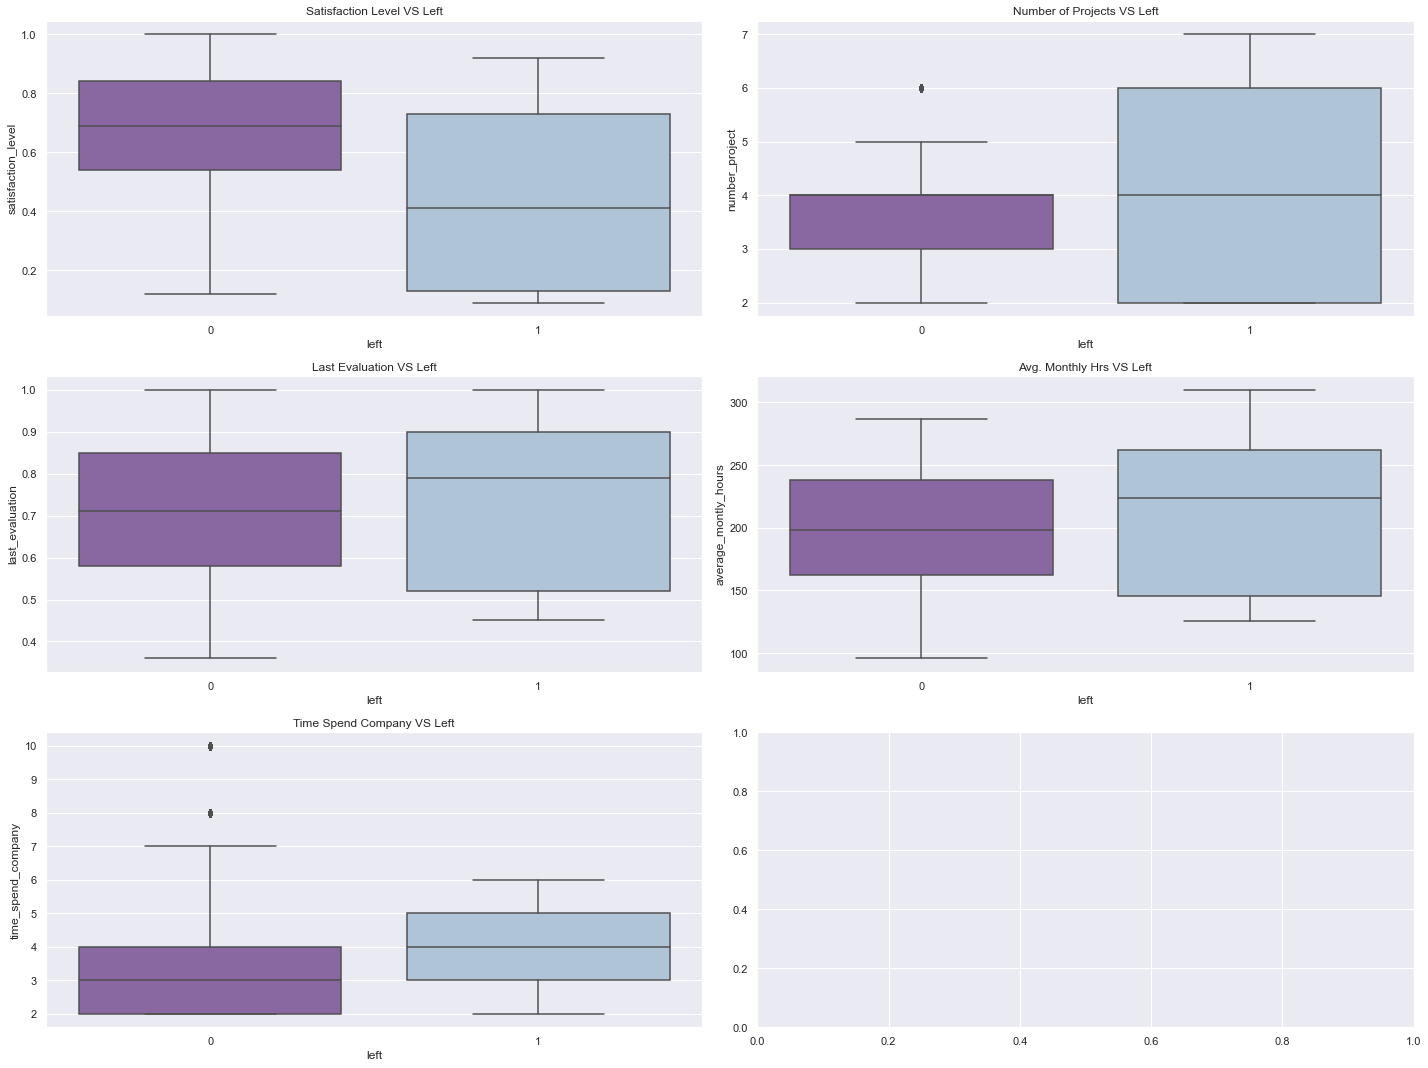

In [61]:
fig, ax = plt.subplots(3,2)
sns.boxplot(data=raw_data, x='left', y='satisfaction_level', ax=ax[0, 0], palette='BuPu_r').set(title='Satisfaction Level VS Left')
sns.boxplot(data=raw_data, x='left', y='number_project', ax=ax[0, 1], palette='BuPu_r').set(title='Number of Projects VS Left')
sns.boxplot(data=raw_data, x='left', y='last_evaluation', ax=ax[1, 0], palette='BuPu_r').set(title='Last Evaluation VS Left')
sns.boxplot(data=raw_data, x='left', y='average_montly_hours', ax=ax[1, 1], palette='BuPu_r').set(title='Avg. Monthly Hrs VS Left')
sns.boxplot(data=raw_data, x='left', y='time_spend_company', ax=ax[2, 0], palette='BuPu_r').set(title='Time Spend Company VS Left')


fig.tight_layout()
fig.show()

**<span>Take-Away from the plots:- </span>**

* **<span>Employees having satisfaction level in between 0.1 to 0.5 tends to leave the organisation.</span>**
* **<span>Employees handling 3 to 4 projects would likely not leave the organisation.</span>**
* **<span>Employees having high last evaluation value tends to leave the organisation.</span>** [Not much impact]
* **<span>Employees having high avg. monthly hrs tends to leave the organisation.</span>**
* **<span>Employees spending more time with organsation tends to leave the organisation.</span>**

## **<span style="color:#483D8B;"><justify>DATA CORRELATION</justify></span>**

<AxesSubplot:>

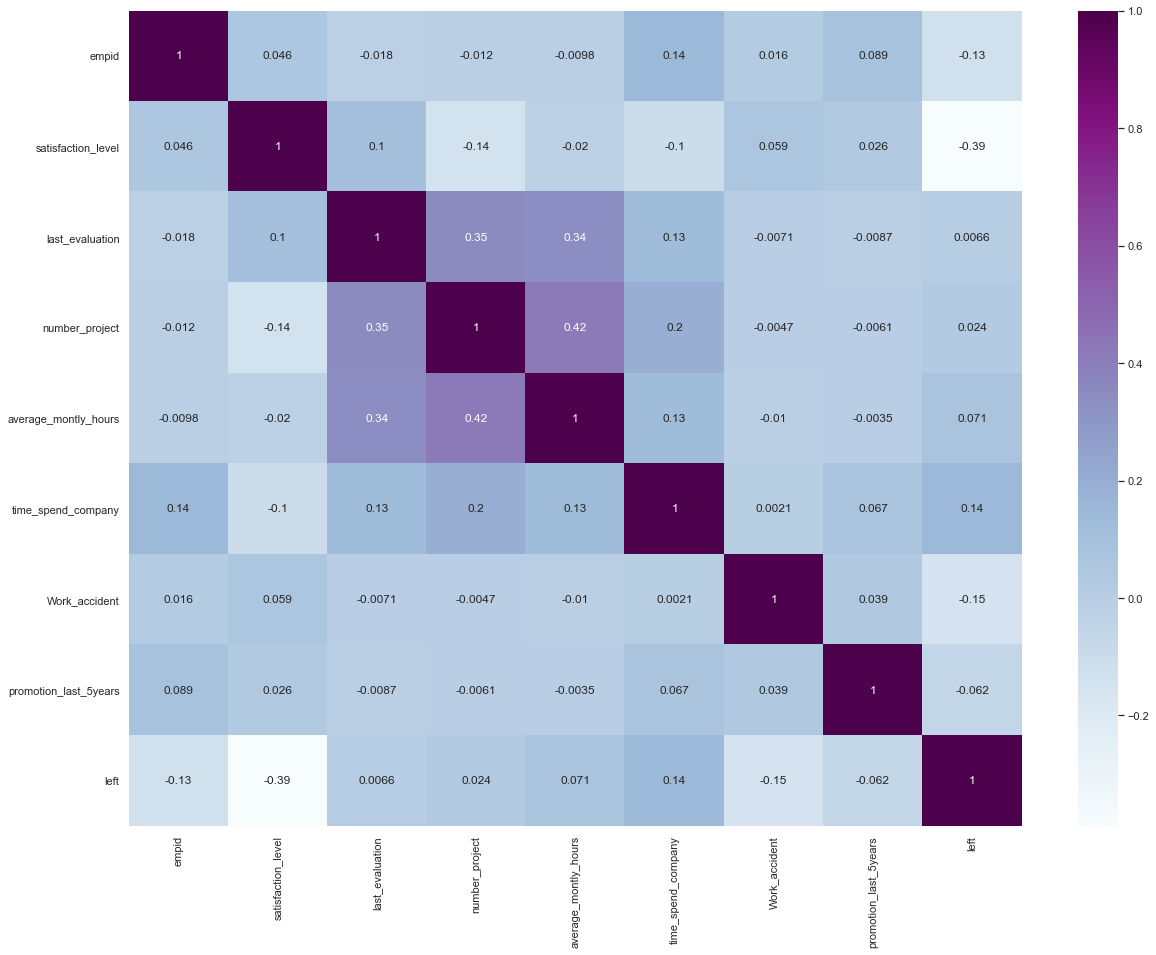

In [62]:
sns.heatmap(raw_data.corr(), annot=True, cmap='BuPu')

## **<span style="color:#483D8B;"><justify>PAIRPLOT</justify></span>**

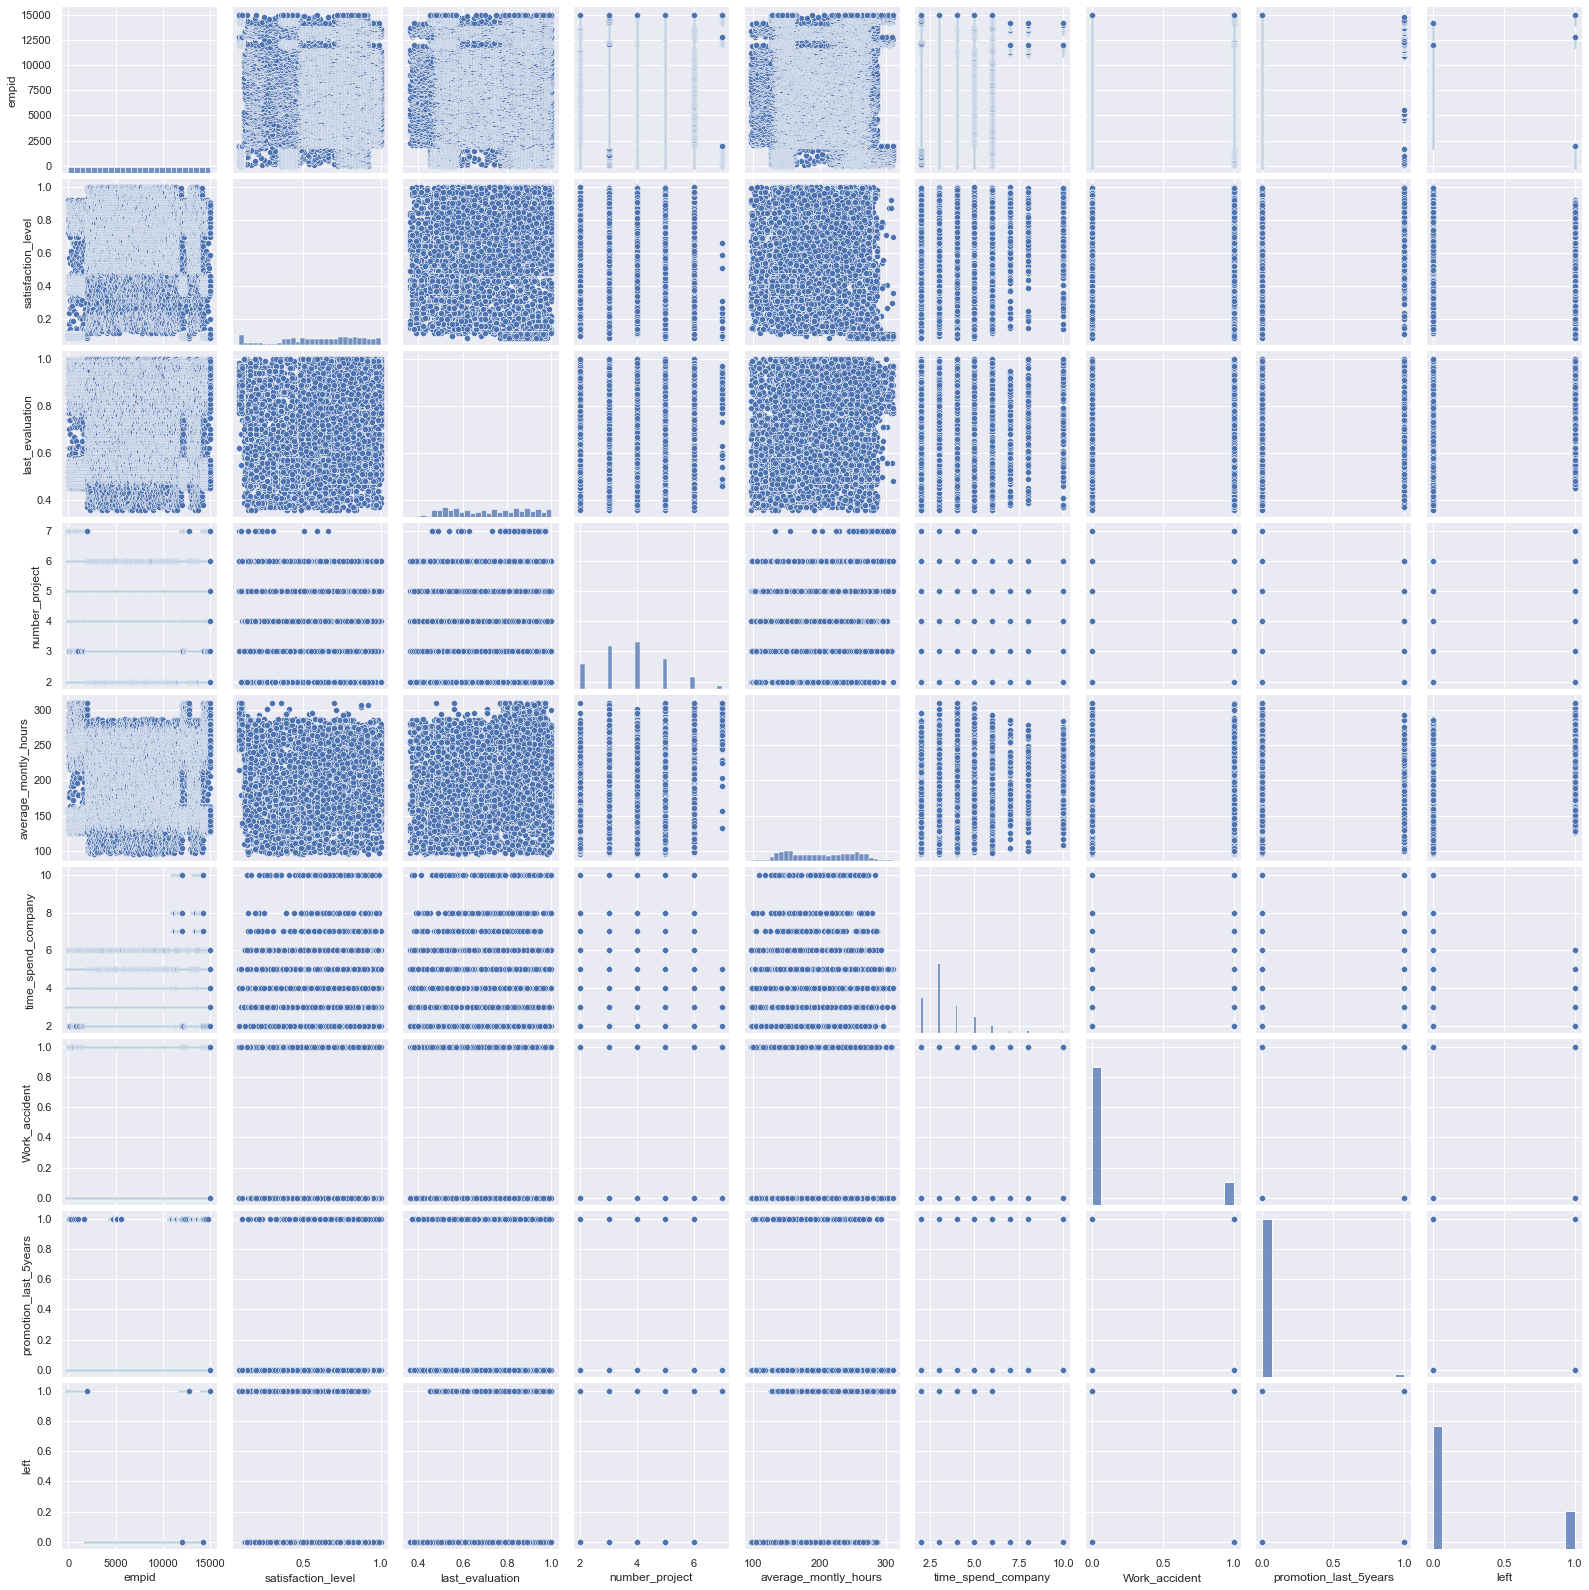

In [63]:
sns.pairplot(data=raw_data)